In [1]:
import sys
from pathlib import Path
path = Path("/Users/ismailguzel/Library/CloudStorage/OneDrive-itu.edu.tr/current-research/time-series-generator")
sys.path.insert(0, path.as_posix())
pwd = path.parent
print(pwd)

/Users/ismailguzel/Library/CloudStorage/OneDrive-itu.edu.tr/current-research


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from timeseries_generator.generator import TimeSeriesGenerator
from timeseries_generator.visualizer import TimeSeriesVisualizer

In [5]:
generated_df

,data,mean_shift,variance_shift,trend_shift,anomaly
0,-479.122571,0,0,0,0
1,771.415110,0,0,0,0
2,190.410366,0,0,0,0
3,-564.577999,0,0,0,0
4,-361.256786,0,0,0,0
...,...,...,...,...,...
395,545.187909,0,0,0,0
396,-163.277090,0,0,0,0
397,-563.846253,0,0,0,0
398,-508.063703,0,0,0,0


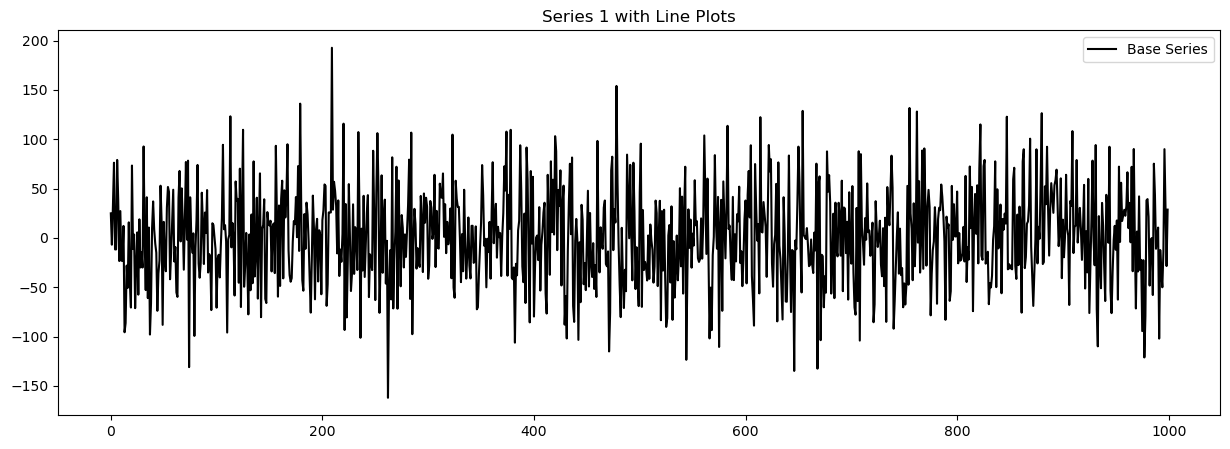

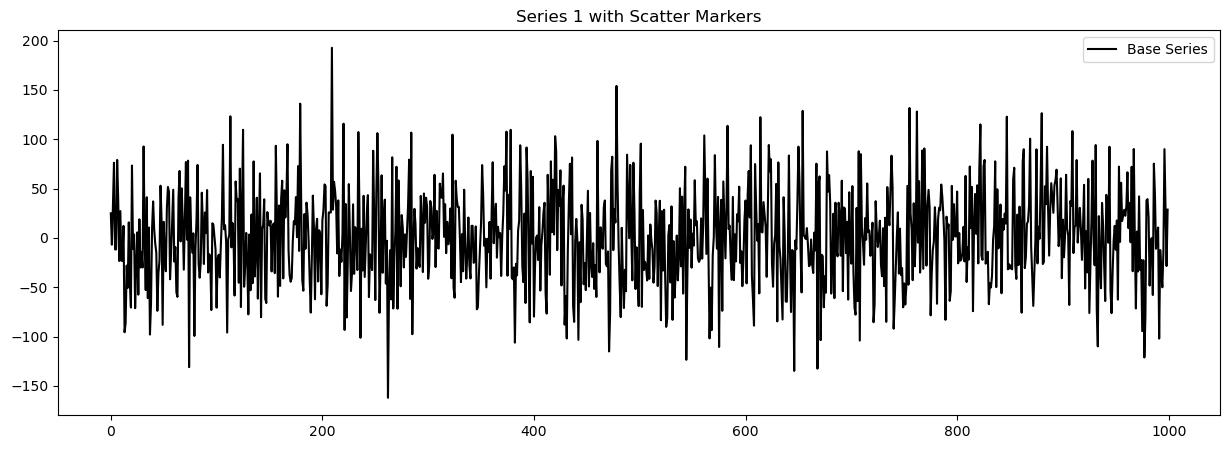

In [62]:
ts = TimeSeriesGenerator(length=1000, random_seed=42)

generated_df= ts.generate_base_series("white_noise")
TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)
TimeSeriesVisualizer().plot_series_scatter([generated_df], save=False)

* SARIMA ile ilgili sorun
* blue noise white noise pink noise eklenecek
* base series forecasting PFN makalkesinde ts generator eklenebilir.

Butun base seriler bir s

In [64]:
generated_df

,data,mean_shift,variance_shift,trend_shift,anomaly
0,-1.667251,0,0,0,0
1,0.321049,0,0,0,0
2,1.091072,0,0,0,0
3,-0.244447,0,0,0,0
4,0.927903,0,0,0,0
...,...,...,...,...,...
395,0.175701,0,0,0,0
396,-6.964747,0,0,0,1
397,5.753667,0,0,0,1
398,-0.225964,0,0,0,0


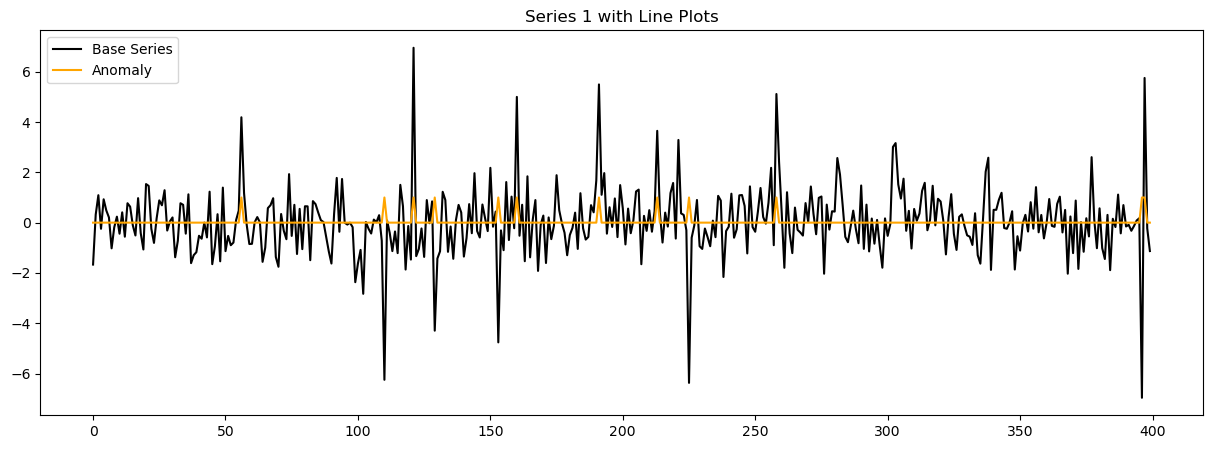

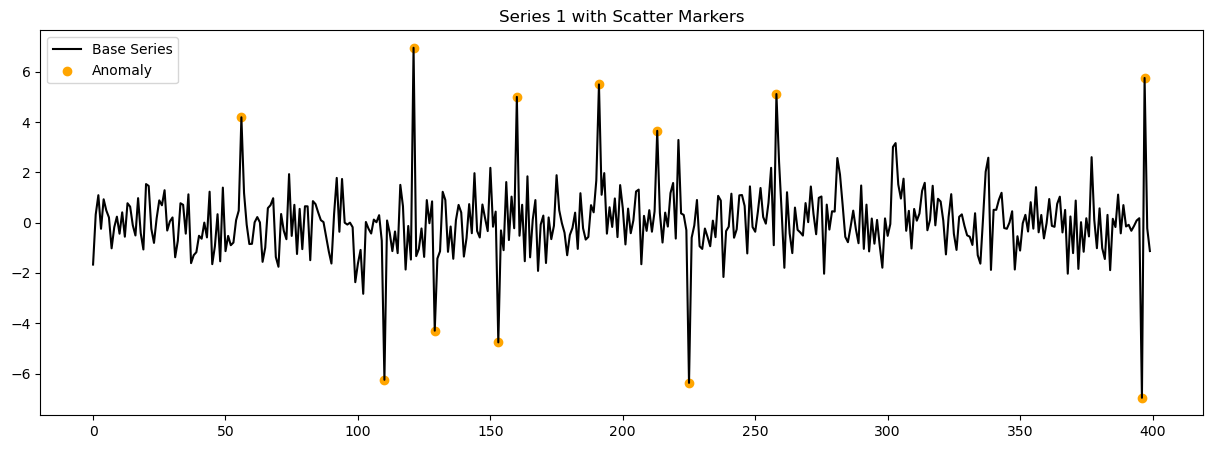

In [63]:
ts = TimeSeriesGenerator(length=400, random_seed=100)
base= ts.generate_base_series('white_noise')
generated_df = ts.generate_point_anomalies(df=base)
TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)
TimeSeriesVisualizer().plot_series_scatter([generated_df], save=False)


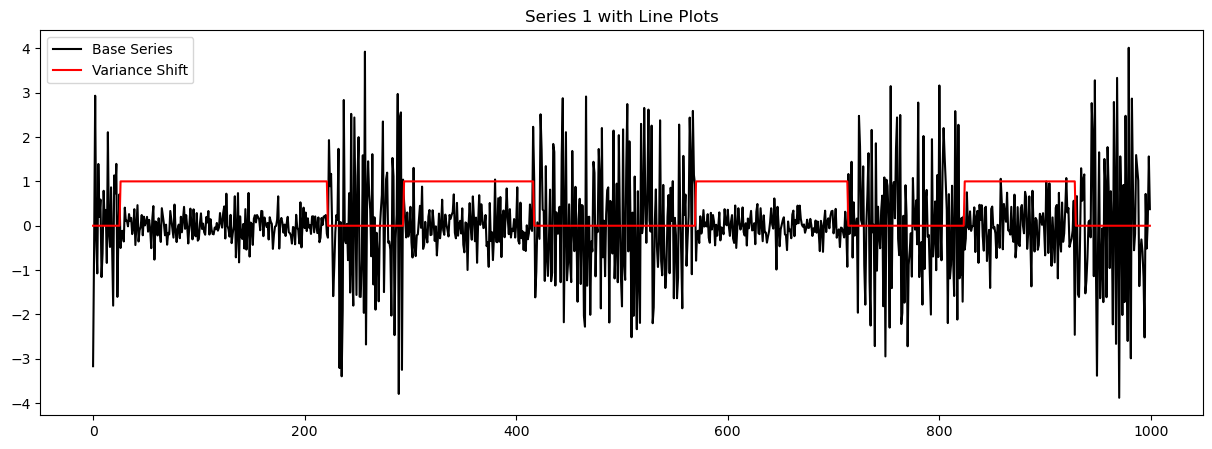

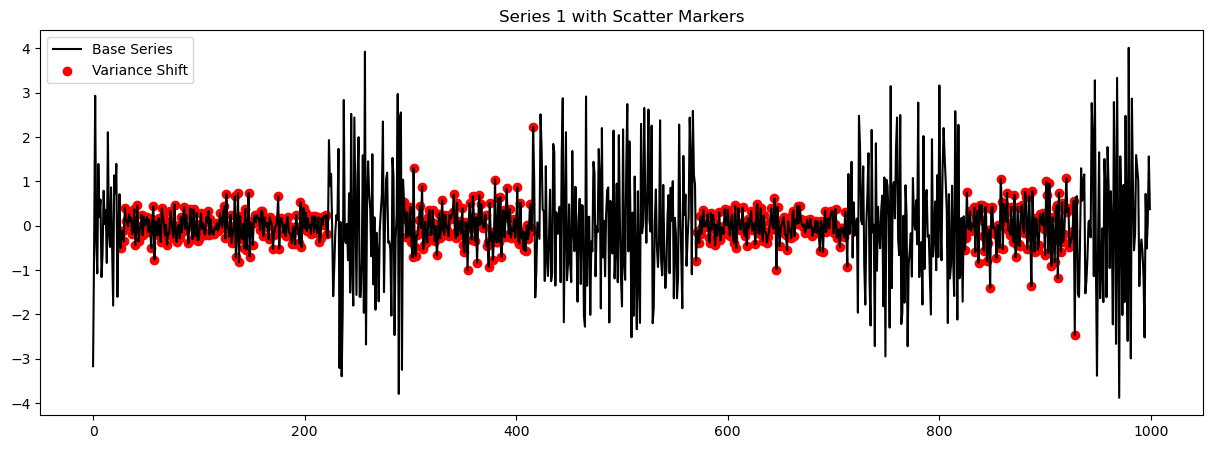

In [81]:
ts = TimeSeriesGenerator(length=1000, random_seed=None)
base= ts.generate_base_series('arma')
generated_df = ts.generate_variance_shift(df = base,
                                          sign = -1,
                                          num_breaks=4,
                                          scale_factor=2)
TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)
TimeSeriesVisualizer().plot_series_scatter([generated_df], save=False)


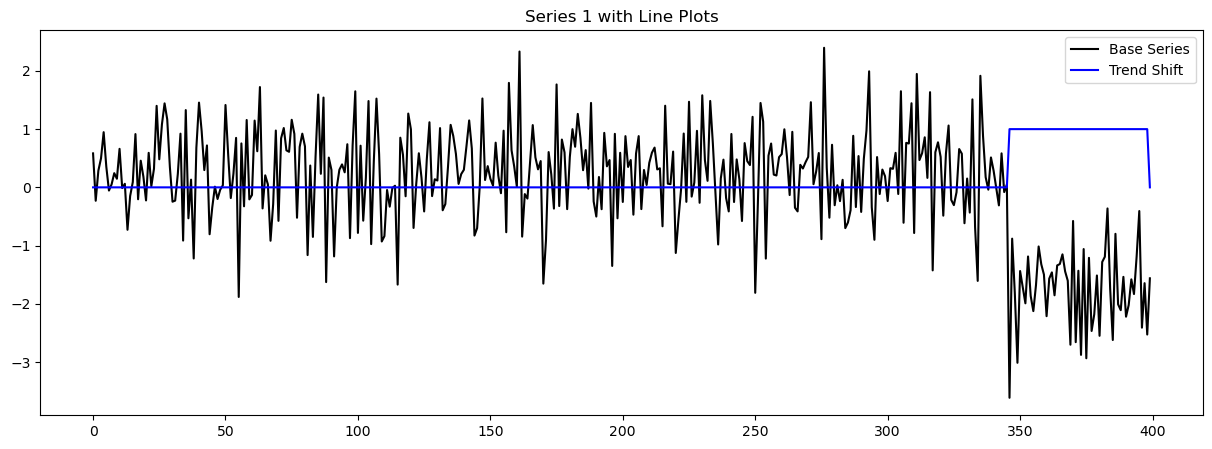

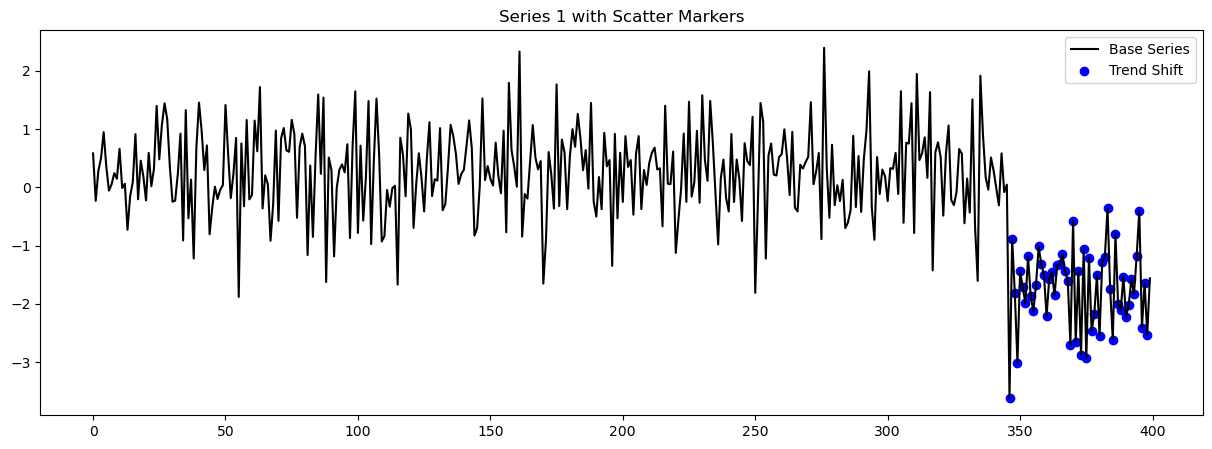

In [105]:
ts = TimeSeriesGenerator(length=400, random_seed=100)
base= ts.generate_base_series('arma')
generated_df = ts.generate_trend_shift(df = base, 
                                       num_breaks=1,
                                       sign = -1 ,
                                       location = 'end',
                                       scale_factor=10,
                                   change_type='direction_change')
    
TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)
TimeSeriesVisualizer().plot_series_scatter([generated_df], save=False)


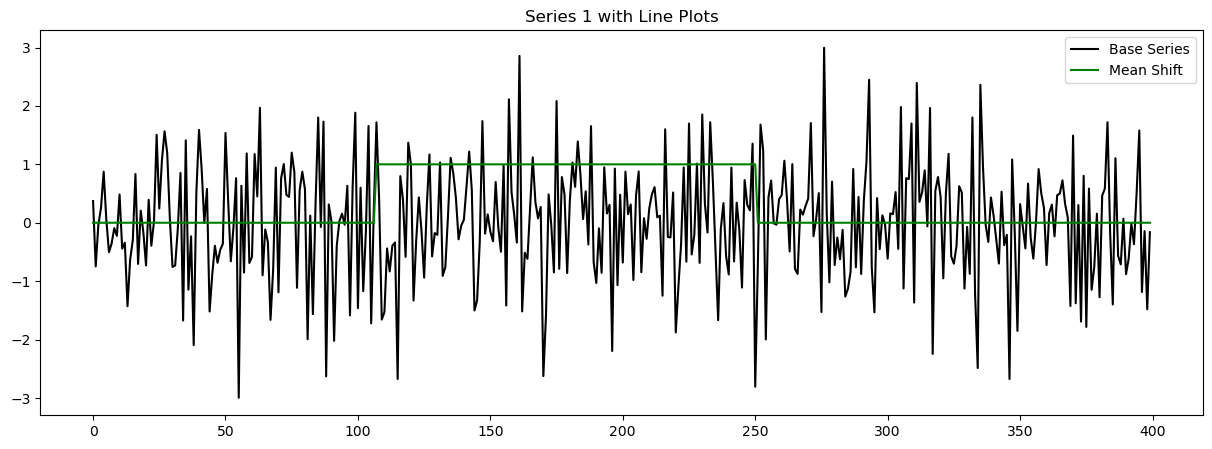

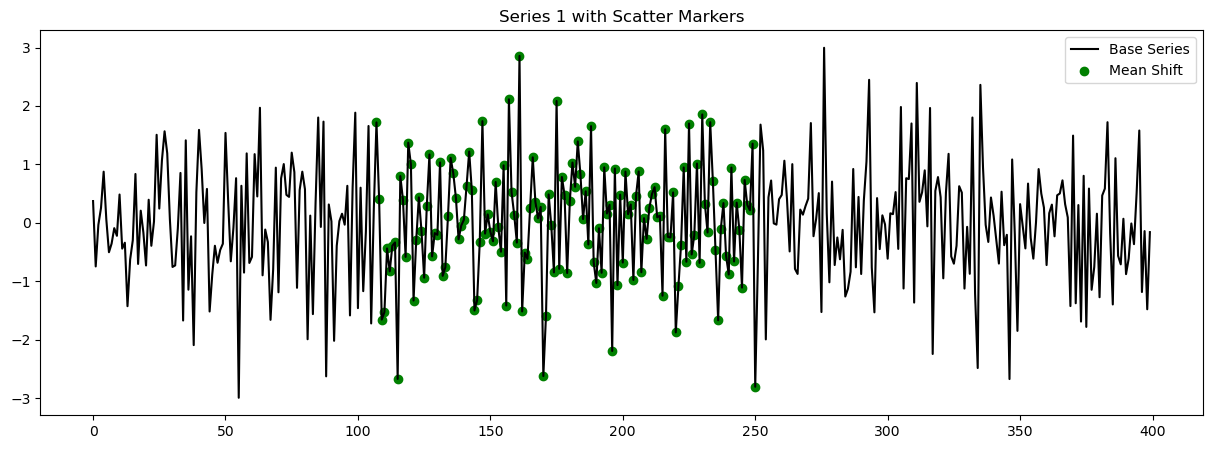

In [121]:
ts = TimeSeriesGenerator(length=400, random_seed=100)
base= ts.generate_base_series('arma')
generated_df = ts.generate_mean_shift(df = base, 
                                       num_breaks=1,
                                       sign = 1 ,
                                       location = 'beginning',
                                   scale_factor=1)
TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)
TimeSeriesVisualizer().plot_series_scatter([generated_df], save=False)


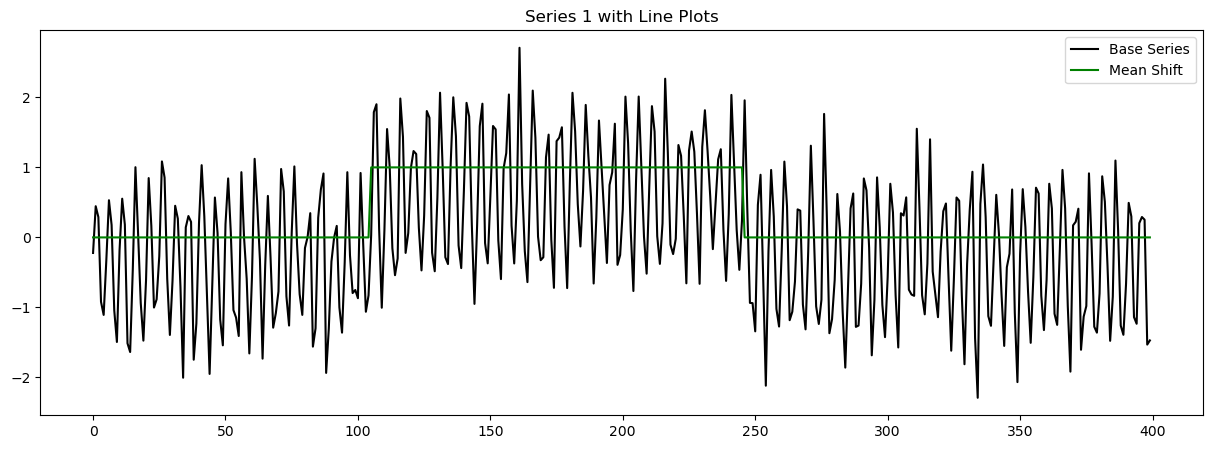

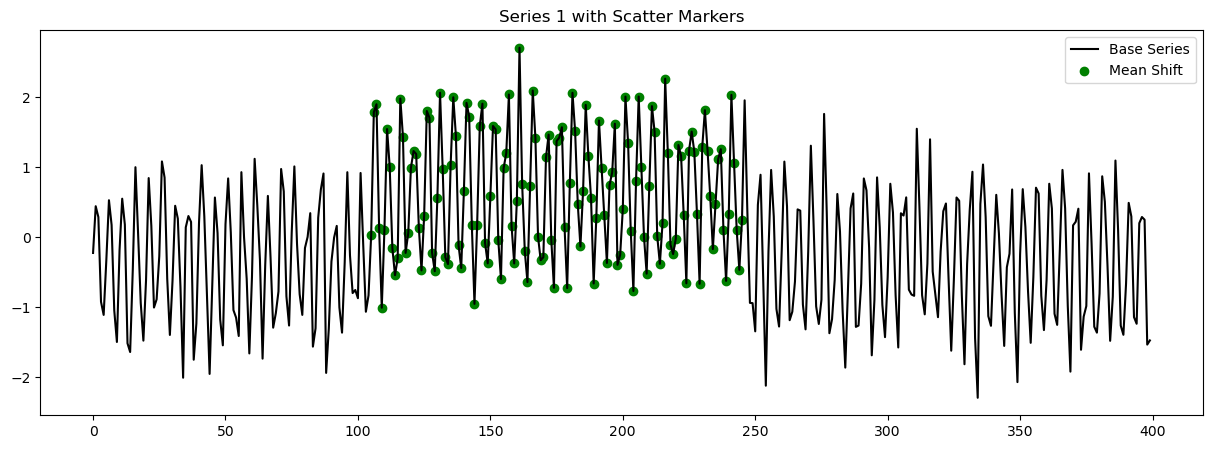

In [122]:
ts = TimeSeriesGenerator(length=400, random_seed=100)
base = ts.generate_base_series('arma')
period,seasonal_series = ts.generate_seasonality(df = base)
generated_df = ts.generate_mean_shift(df = seasonal_series,
                                                sign = 1,
                                                location = 'beginning',
                                                num_breaks= 1,
                                                seasonal_period = period)
TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)
TimeSeriesVisualizer().plot_series_scatter([generated_df], save=False)

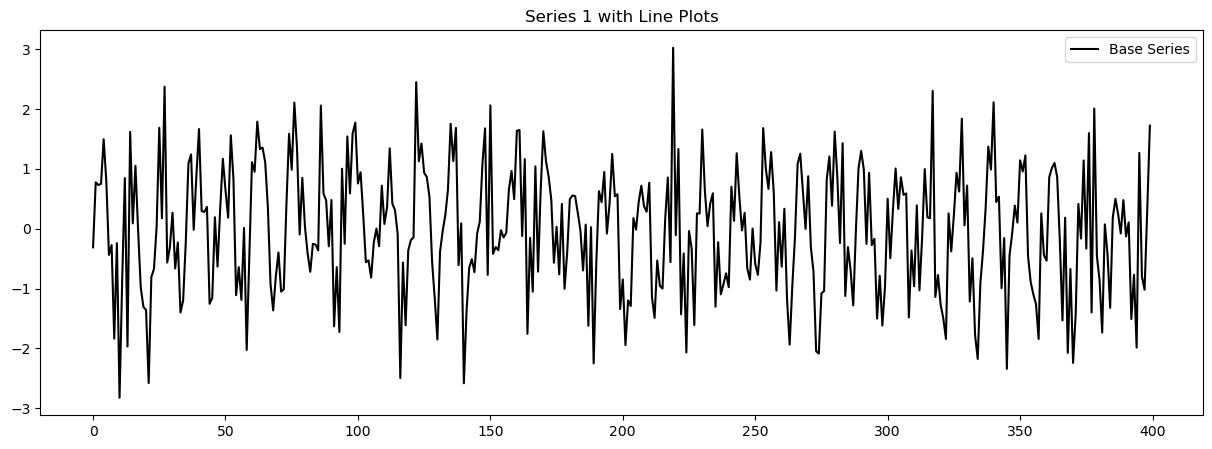

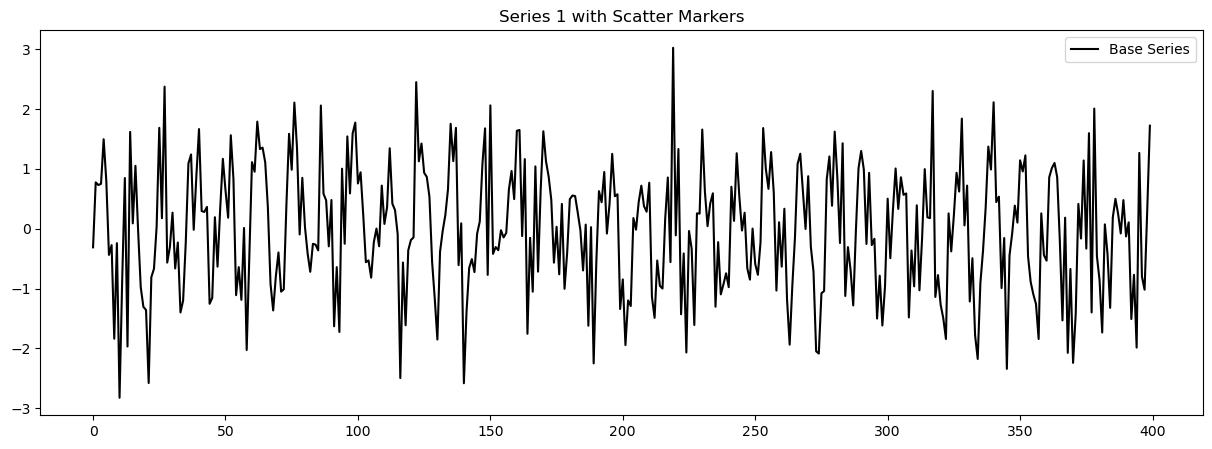

In [127]:
ts = TimeSeriesGenerator(length=400, random_seed=None)
base = ts.generate_base_series('arma')
cubic_trend_decrease = ts.generate_deterministic_trend_cubic(df = base, sign = -1)
_,generated_df = ts.generate_seasonality(df = cubic_trend_decrease, scale_factor = 1)
generated_df['data'] += np.random.normal(0, 0.3, len(generated_df))


TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)
TimeSeriesVisualizer().plot_series_scatter([generated_df], save=False)

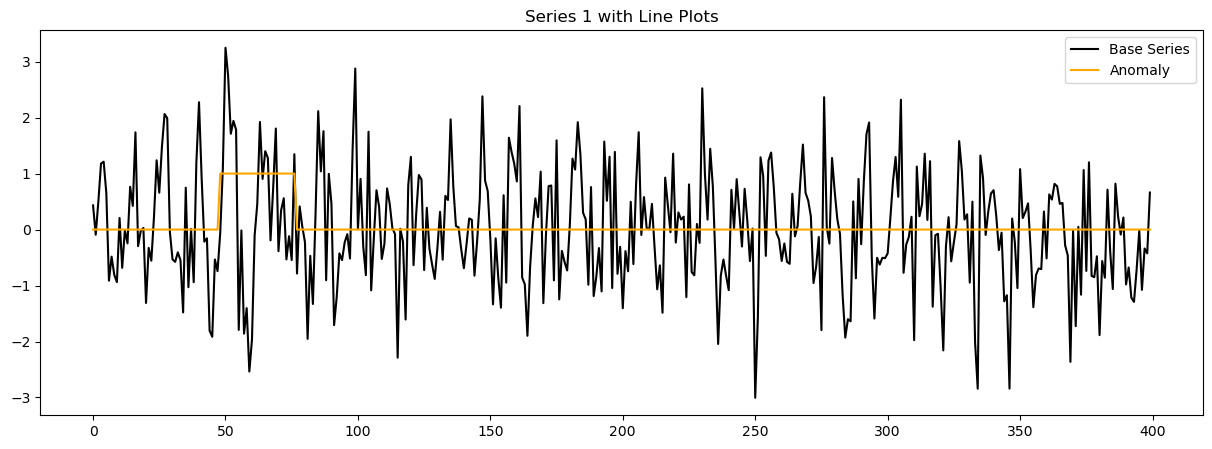

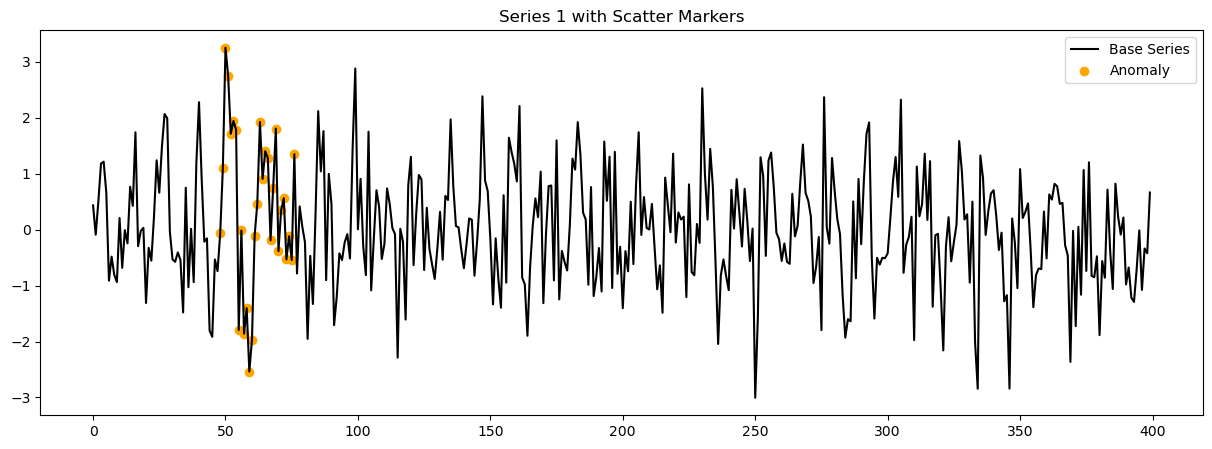

In [129]:
ts = TimeSeriesGenerator(length=400, random_seed=100)
base = ts.generate_base_series('arma')
cubic_trend_decrease = ts.generate_deterministic_trend_cubic(df = base, sign = -1)
period,cubic_trend_decrease_seasonality = ts.generate_seasonality(df = cubic_trend_decrease, scale_factor = 1)
cubic_trend_decrease_seasonality['data'] += np.random.normal(0, 0.3, len(cubic_trend_decrease_seasonality))
generated_df = ts.generate_collective_anomalies(df = cubic_trend_decrease_seasonality, change_type = 'seasonal', seasonal_period = period)



TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)
TimeSeriesVisualizer().plot_series_scatter([generated_df], save=False)

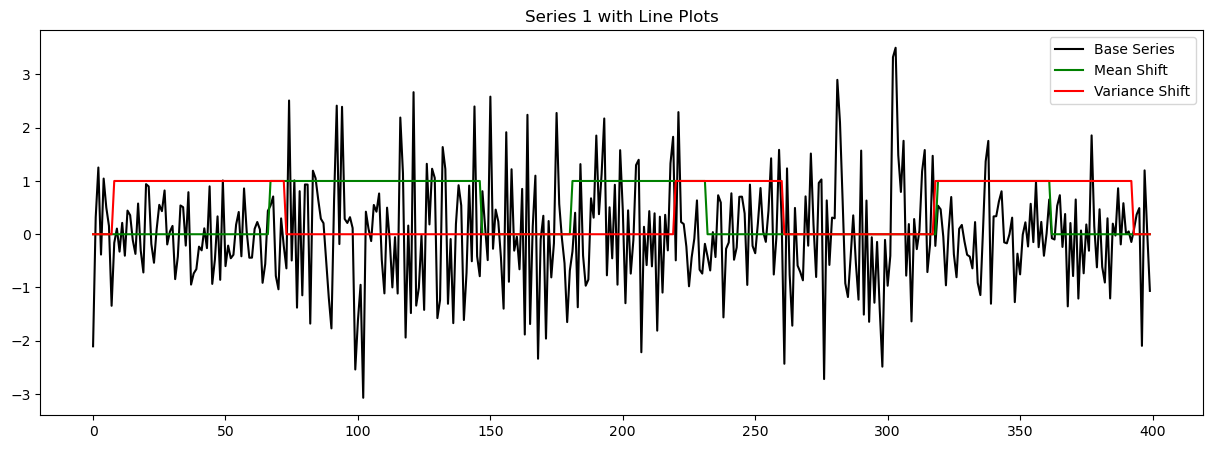

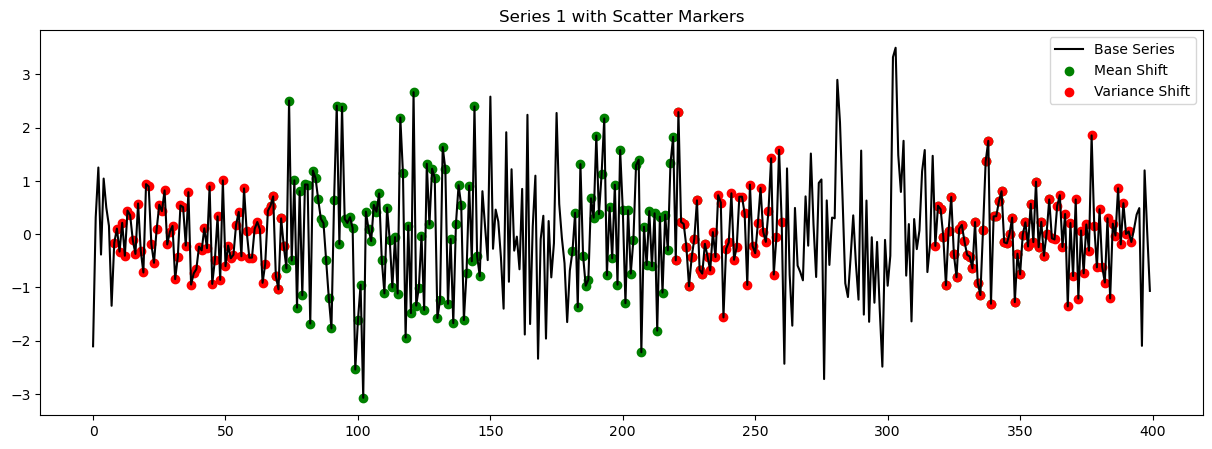

In [130]:
ts = TimeSeriesGenerator(length=400, random_seed=100)
base = ts.generate_base_series()
series_mean_shift = ts.generate_mean_shift(df = base, sign = 1, num_breaks = 3)
generated_df = ts.generate_variance_shift(df = series_mean_shift, sign = -1, num_breaks = 3)


TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)
TimeSeriesVisualizer().plot_series_scatter([generated_df], save=False)

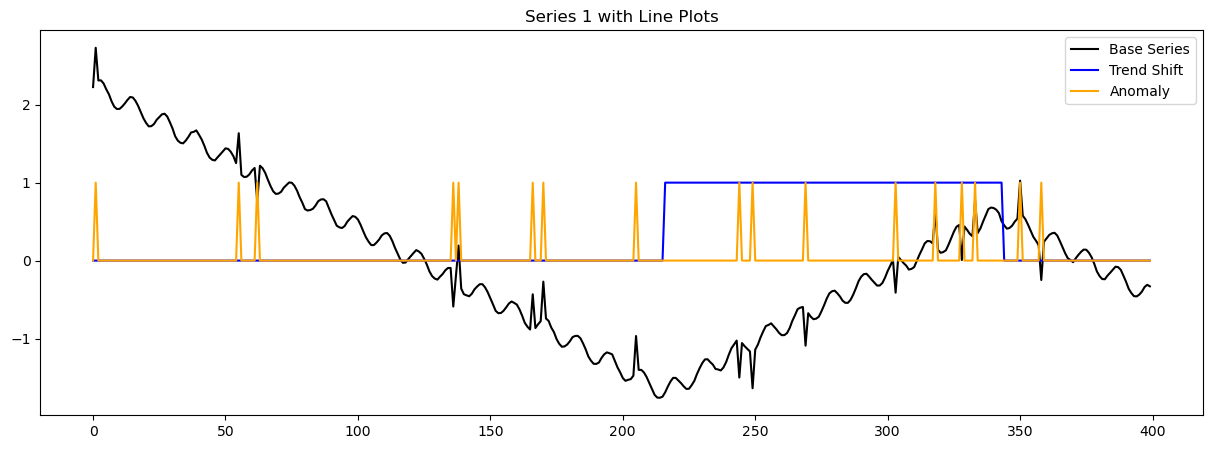

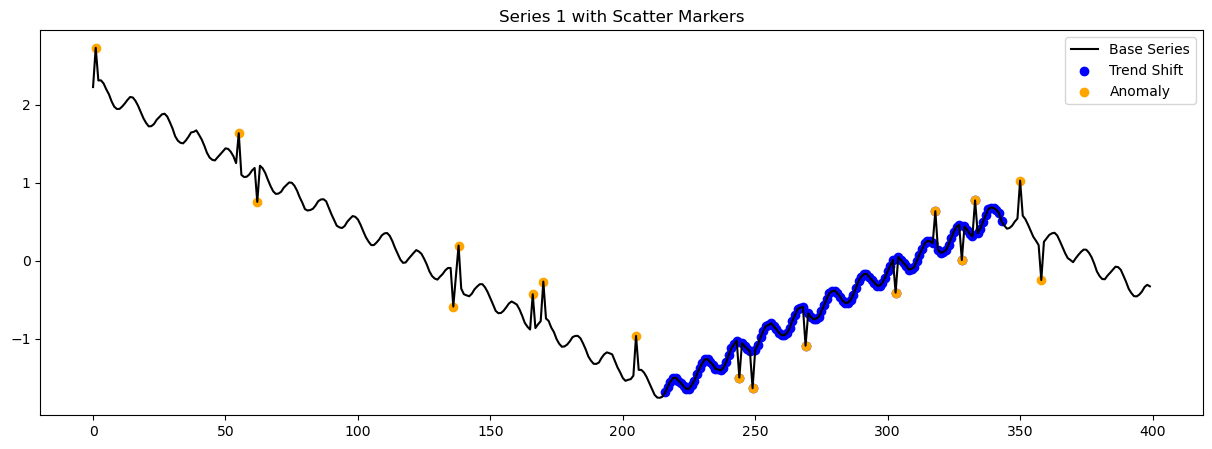

In [140]:
ts = TimeSeriesGenerator(length=400, random_seed=None)
base = ts.generate_base_series('white_noise')
base_with_trend = ts.generate_deterministic_trend_linear(base, sign=1)
base_with_seasonality = ts.generate_seasonality(base_with_trend)[1]
generated_df = ts.generate_point_anomalies(base_with_seasonality)
generated_df = ts.generate_trend_shift(generated_df, sign=-1, location='middle', change_type='direction_change')
TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)
TimeSeriesVisualizer().plot_series_scatter([generated_df], save=False)

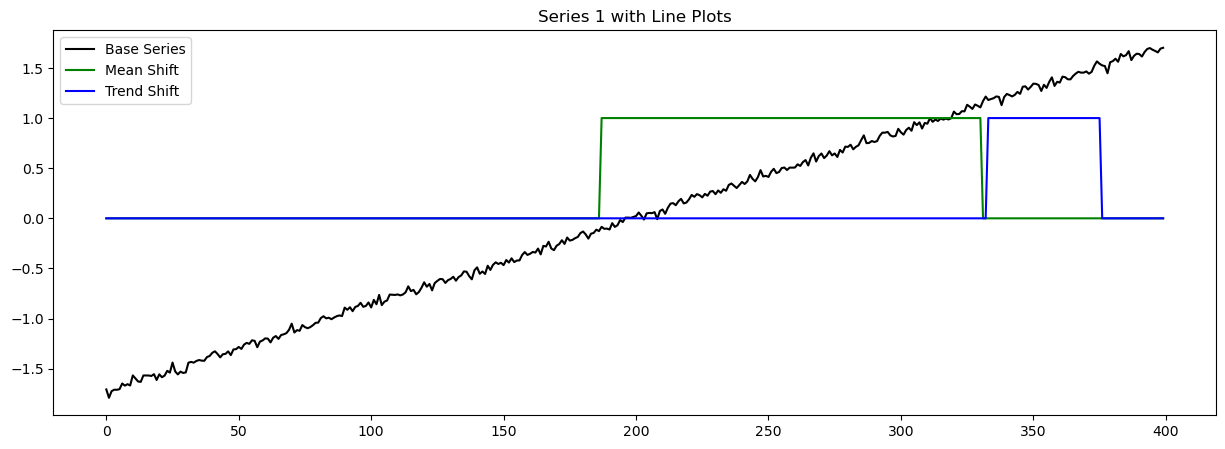

In [131]:
ts = TimeSeriesGenerator(length=400, random_seed=100)
base = ts.generate_base_series('ar')
base_with_gradual_mean = ts.generate_gradual_mean_shift(base, sign=1, location='middle')
generated_df = ts.generate_gradual_trend_shift(base_with_gradual_mean, sign=1, location='end', scale_factor=3, change_type='magnitude_change')
TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)

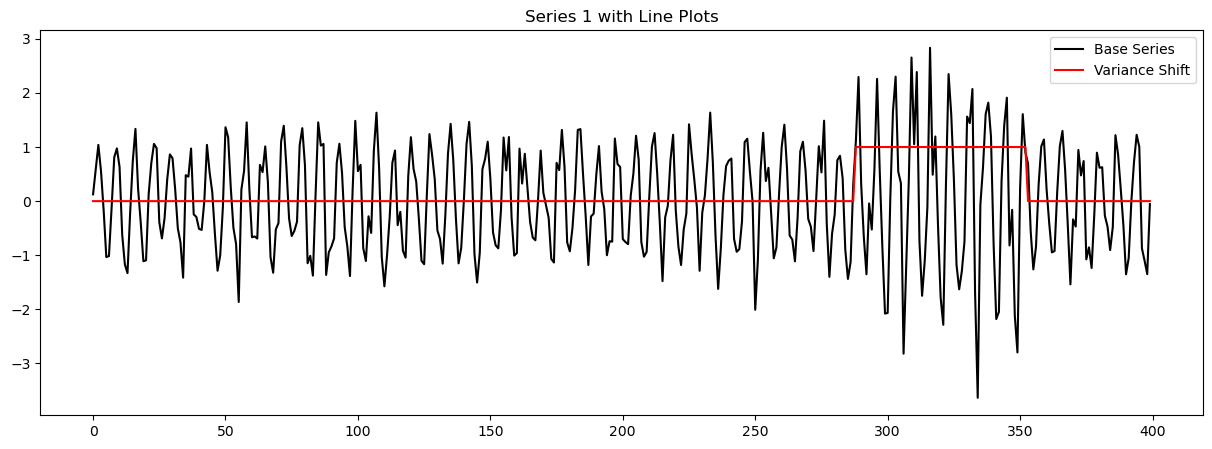

In [141]:
ts = TimeSeriesGenerator(length=400, random_seed=100)
base = ts.generate_base_series('arma')
seasonal_period, base_with_seasonality = ts.generate_seasonality(base)
generated_df = ts.generate_variance_shift(base_with_seasonality, sign=1, location='end')
TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)

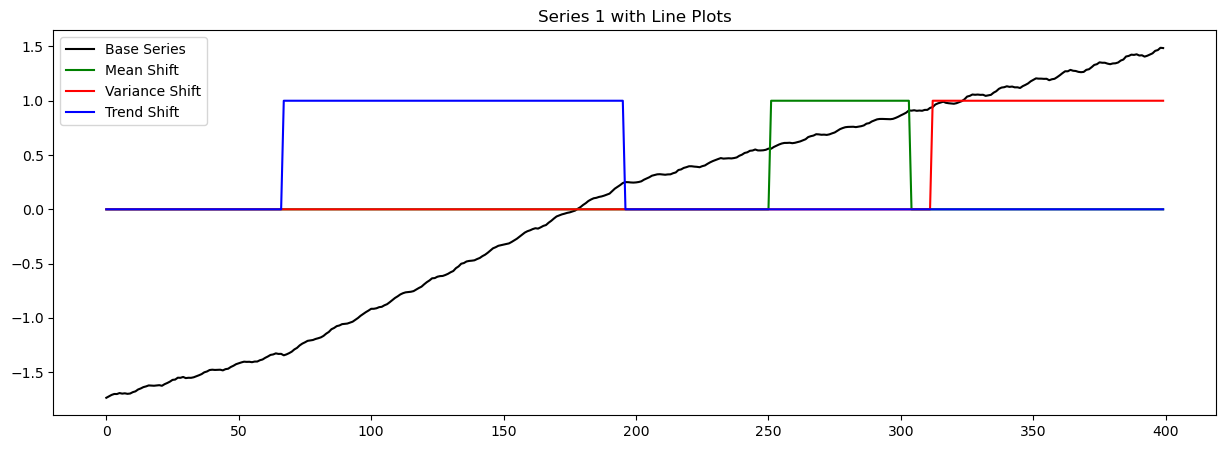

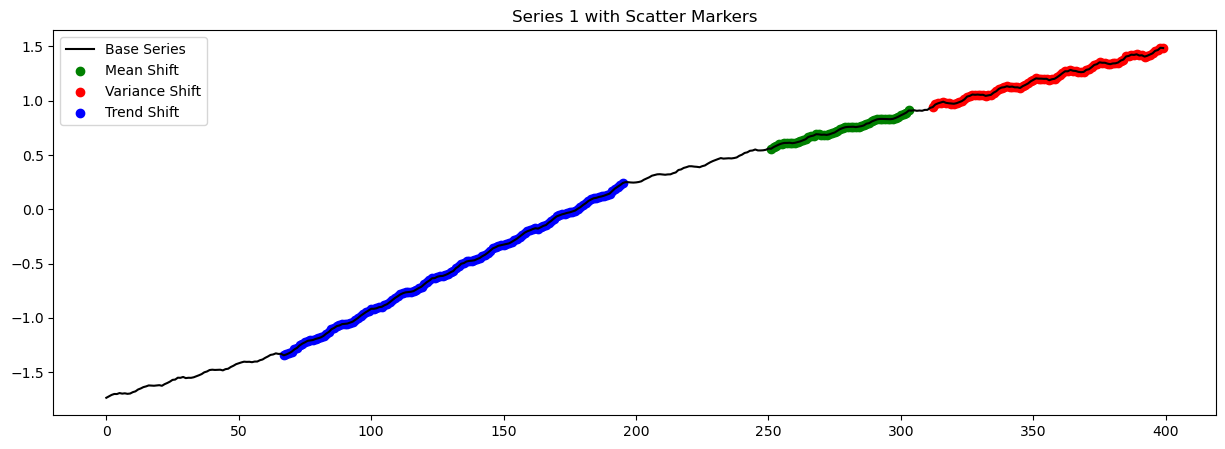

In [150]:
ts = TimeSeriesGenerator(length=400, random_seed=None)
base = ts.generate_base_series('arma')
base_with_trend = ts.generate_deterministic_trend_linear(base, sign=1)
base_with_seasonality = ts.generate_seasonality(base_with_trend)[1]
generated_df = ts.generate_mean_shift(base_with_seasonality, sign=-1, location='middle')
generated_df = ts.generate_variance_shift(generated_df, sign=1, location='end')
generated_df = ts.generate_trend_shift(generated_df, 
                                       sign=1, 
                                       scale_factor=0.4,
                                       location='beginning', 
                                       change_type='magnitude_change')
TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)
TimeSeriesVisualizer().plot_series_scatter([generated_df], save=False)

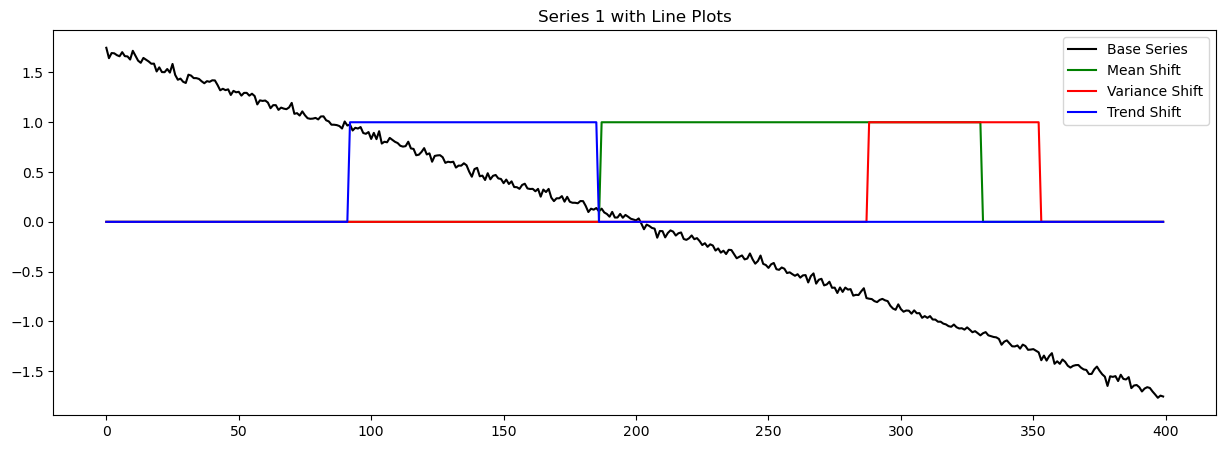

In [151]:
ts = TimeSeriesGenerator(length=400, random_seed=100)
base = ts.generate_base_series('ar')
generated_df = ts.generate_gradual_mean_shift(base, sign=1, location='middle')
generated_df = ts.generate_gradual_variance_shift(generated_df, sign=-1, location='end')
generated_df = ts.generate_gradual_trend_shift(generated_df, 
                                               sign=-1, 
                                               location='beginning', 
                                               change_type='direction_change')
TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)

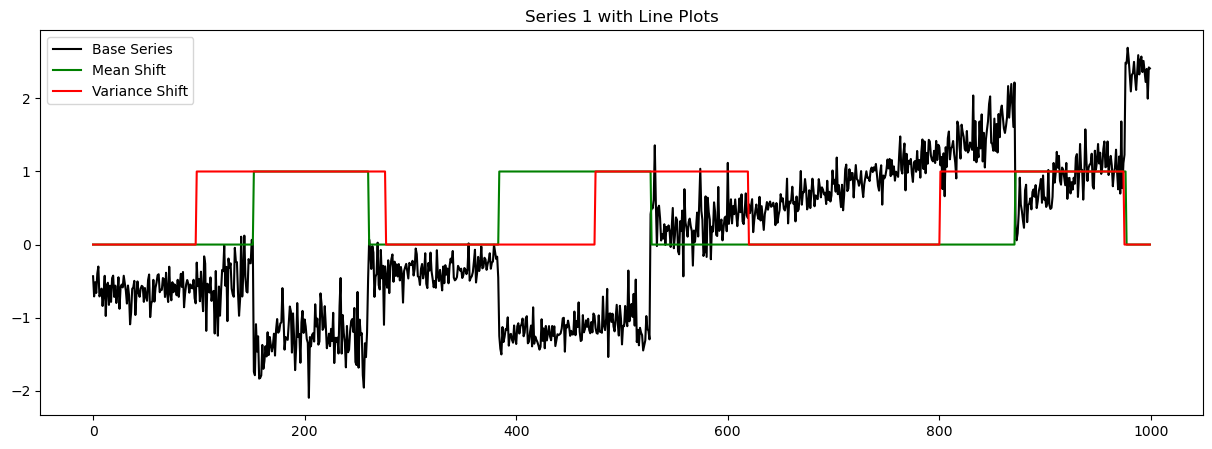

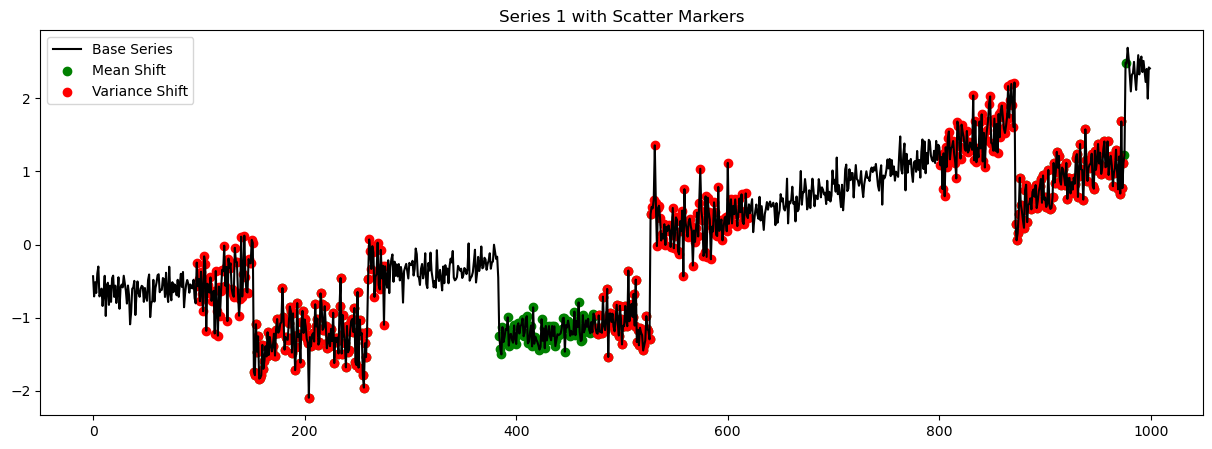

In [159]:
ts = TimeSeriesGenerator(length=1000, random_seed=None)
base = ts.generate_base_series('arma')
seasonal_period, base_with_seasonality = ts.generate_seasonality(base)
base_with_trend = ts.generate_deterministic_trend_cubic(base_with_seasonality,noise_std=50, sign=1)
generated_df = ts.generate_mean_shift(base_with_trend,num_breaks=3, sign=-1, location='middle')
generated_df = ts.generate_variance_shift(generated_df, num_breaks=3,sign=1, location='end')
TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)
TimeSeriesVisualizer().plot_series_scatter([generated_df], save=False)

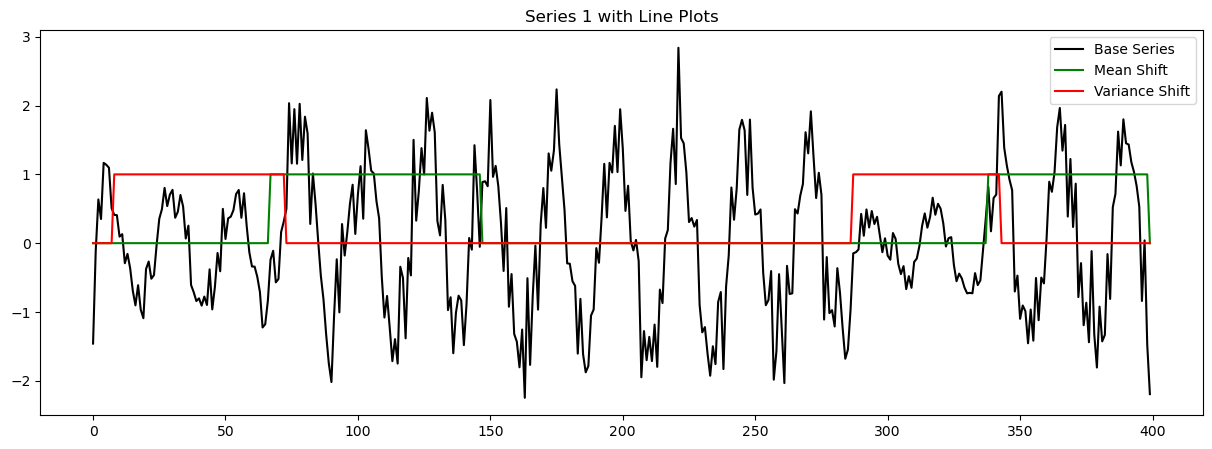

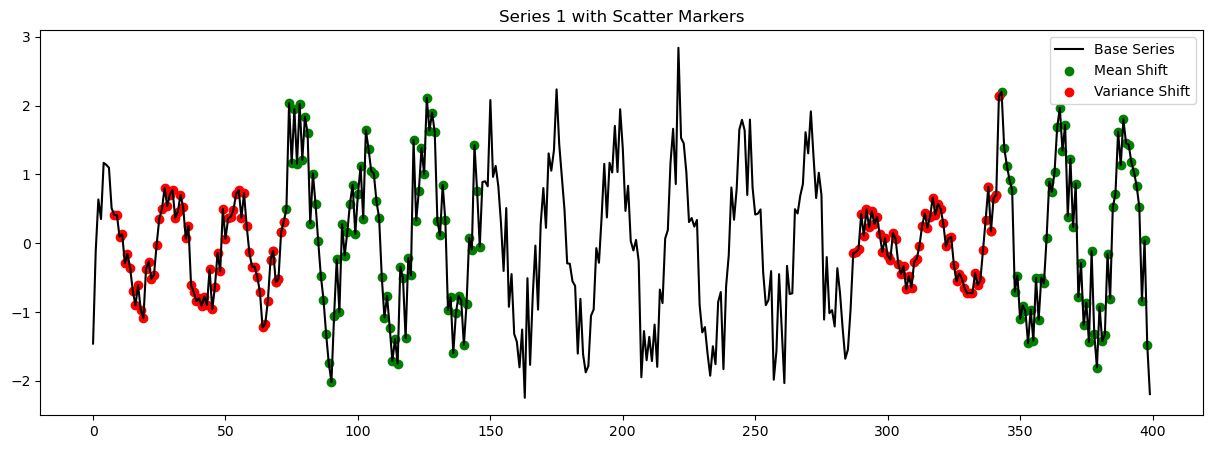

In [187]:
ts = TimeSeriesGenerator(length=400, random_seed=100)
base = ts.generate_base_series('white_noise')
base_with_seasonality = ts.generate_seasonality(base)[1]
generated_df = ts.generate_mean_shift(base_with_seasonality, sign=1, num_breaks=2)
generated_df = ts.generate_variance_shift(generated_df, sign=-1, num_breaks=2)
TimeSeriesVisualizer().plot_series_lines([generated_df], save=False)
TimeSeriesVisualizer().plot_series_scatter([generated_df], save=False)

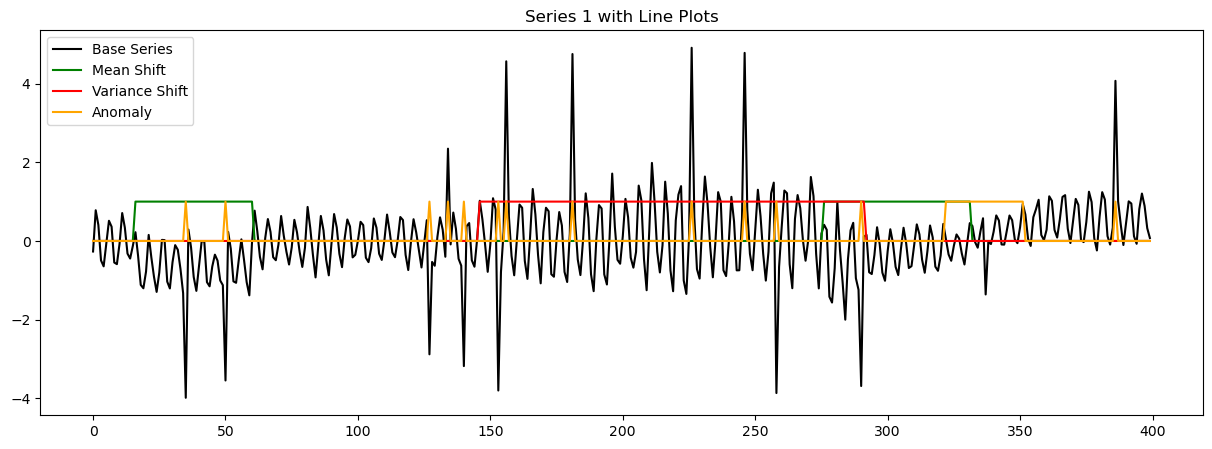

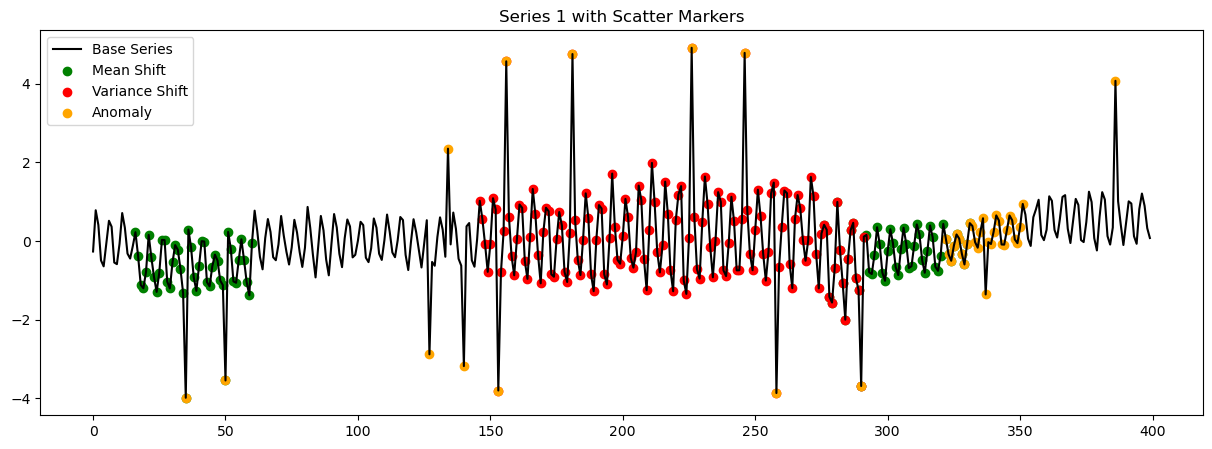

In [184]:
ts = TimeSeriesGenerator(length=400, random_seed=200)

base = ts.generate_base_series('white_noise')
base_with_cubic_trend = ts.generate_deterministic_trend_cubic(base, sign=1)
seasonal_period, base_with_seasonality = ts.generate_seasonality(base_with_cubic_trend)
base_with_mean_shift = ts.generate_mean_shift(base_with_seasonality, sign=-1, location='end', num_breaks=2)
base_with_variance_shift = ts.generate_variance_shift(base_with_mean_shift, sign=1, location='middle')
generated_df = ts.generate_point_anomalies(base_with_variance_shift)
generated_df = ts.generate_collective_anomalies(generated_df, change_type='variance', seasonal_period=seasonal_period)

visualizer = TimeSeriesVisualizer()
visualizer.plot_series_lines([generated_df], save=False)
visualizer.plot_series_scatter([generated_df], save=False)

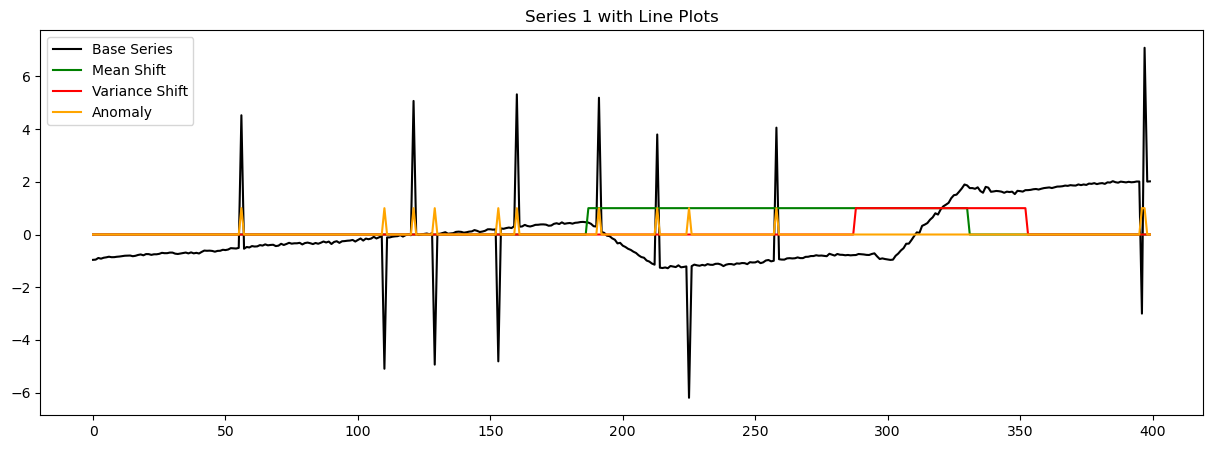

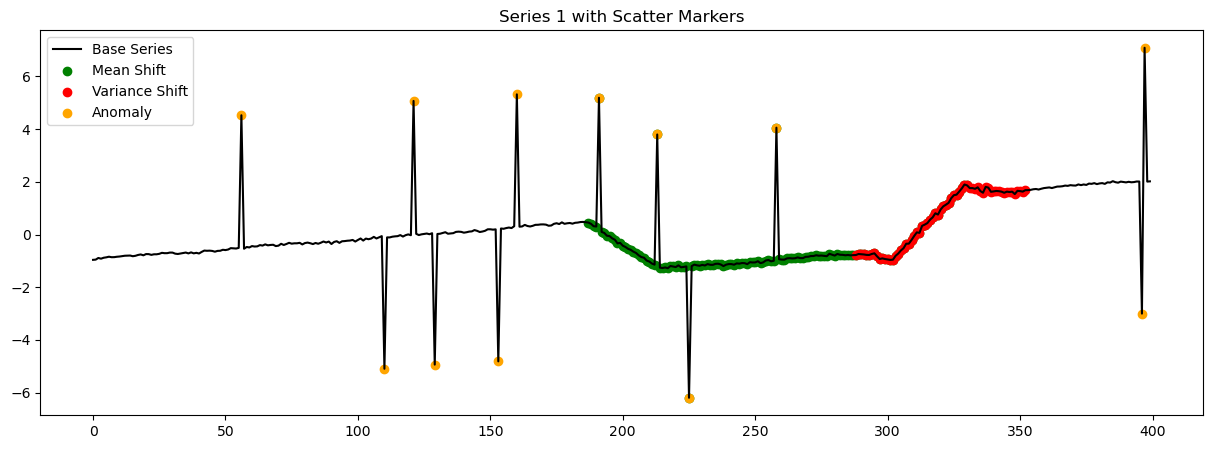

In [180]:
ts = TimeSeriesGenerator(length=400, random_seed=100)
base = ts.generate_base_series('white_noise')
seasonal_period, base_with_seasonality = ts.generate_seasonality(base)
base_with_trend = ts.generate_deterministic_trend_linear(base_with_seasonality, sign=1)
base_with_mean_shift = ts.generate_gradual_mean_shift(base_with_trend, sign=-1, location='middle')
base_with_variance_shift = ts.generate_gradual_variance_shift(base_with_mean_shift, sign=1, location='end')
generated_df = ts.generate_point_anomalies(base_with_variance_shift)
visualizer = TimeSeriesVisualizer()
visualizer.plot_series_lines([generated_df], save=False)
visualizer.plot_series_scatter([generated_df], save=False)